### Домашнее задание по sklearn

В следующей ячейке мы импортируем библиотеки и фиксируем случайность. Значение сида(seed), а в нашем случае, 42, фиксирует случайность. Что это значит? 

После написания такой строчки, операции из ```numpy```, например, генерация датасета, будут все еще случайными,
но для всех запускающих этот код -- одинаковыми.

Пожалуйста, обращайте на него внимание во всех заданиях. Это требуется для проверки ваших решений и его удаление или изменение может повлечь за собой ошибки.

In [1]:
import sklearn
import numpy as np

np.random.seed(42)

# Задание 1

1. Получите выборку с помощью следующего вызова:
```
sklearn.datasets.make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Отправьте значение доли верных ответов(`accuracy`), которое получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [3]:
data = sklearn.datasets.make_moons(n_samples=1000, noise=0.5, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.5, random_state=10)
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 21, 1)},
                             cv=KFold(n_splits=5))
grid_searcher.fit(X_train, y_train)
best_predictions = grid_searcher.predict(X_test)

accuracy = accuracy_score(y_test, best_predictions)

In [4]:
# Небольшая проверка для себя
# В таких блоках мы сравниваем хэш вашего ответа и верного. 
# Таким образом вы поймете, правильный ли ваш ответ на данное задание

# Если ничего не вывелось, то ответ верный. Если ошибка, то проверьте это задание.
import hashlib

assert hashlib.sha256(str(round(accuracy, 2)).encode()).hexdigest() == '1e9d7c27c8bbc8ddf0055c93e064a62fa995d177fee28cc8fa949bc8a4db06f4'

In [5]:
# проверка, просто запустите ячейку


# Задание 2

Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от 1 до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра. В данном задании использовать KFold не требуется.

Код ниже строит изображение зависимости качества от количества соседей.

In [6]:
def train_grid_search(X,y):
    grid_searcher = GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors': range(1, 21)})
    grid_searcher.fit(X, y)
    means = grid_searcher.cv_results_['mean_test_score']
    return means

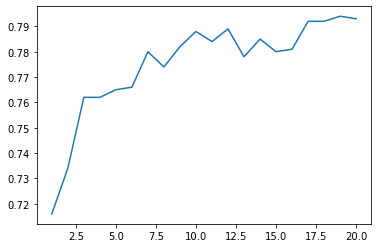

In [7]:
# аккуратно, не меняйте random_state
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
test_score = train_grid_search(X, y)
# небольшая проверка: если не выдалась ошибка, то можете продолжать
assert (type(test_score) == np.ndarray), 'Переменная test_score должна иметь тип np.array()'
assert (len(test_score) == 20), 'Переменная test_score должна иметь 20 значений (по 1 для каждого кол-ва соседей)'

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 21), test_score);

# проверяться будет переменная ```test_score``

In [8]:
# проверка номер 1, просто запустите ячейку

# your code here


In [9]:
# проверка номер 2, запускайте


## Задание 3

Загрузим данные:

In [10]:
!pip install python-mnist

In [11]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('', gz=True)
images, labels = mndata.load_training()

# Далее мы берем только 5000 картинок и меток, чтобы не ждать обучения слишком долго:
images, labels = np.array(images)[:5000, :], np.array(labels)[:5000]

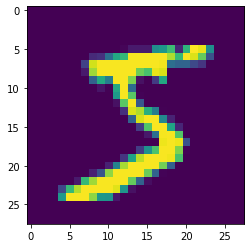

In [12]:
# Так вы можете посмотреть на данные. Например, это картинка номер 0. Можете посмотреть на любую другую!
plt.imshow(images[0].reshape(28, 28))
plt.show()

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузил данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20 и ```random_state=10```. Какой `accuracy` вы получаете на тестовой выборке? Ответ округлите до 3 знаков после запятой.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)
model = KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,y_train)
accuracy_mnist = round(accuracy_score(y_test, model.predict(X_test)),3)

После получения ответа закомментируйте код в предыдущей ячейке и оставьте только строчку

```accuracy_mnist = x.xxx```

In [14]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(accuracy_mnist).encode()).hexdigest() == 'c29699d04c899bb3ddb5bd406ee08397c32b1e1c5c7a8b024f95d815b9556394'

In [15]:
# проверка, просто запустите ячейку


Не забудьте выполнить все ячейкеи, а затем нажать Validate перед отправкой!

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

In [16]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
pred = model.predict(X_test)
number = model.kneighbors(X_test,return_distance=False)

In [17]:
wr_ans=[]
for i in range(len(pred)):
    if pred[i]!=y_test[i]:
        wr_ans.append(i)
wr_ans[0] # наш пример

4

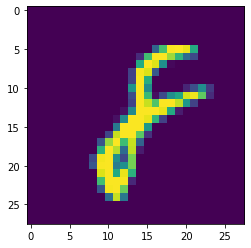

1


In [18]:
plt.imshow(X_test[4].reshape(28, 28)) #  Исходное число
plt.show()
print(pred[4]) # предсказанное число

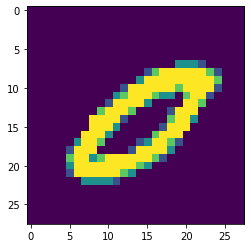

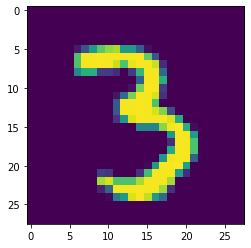

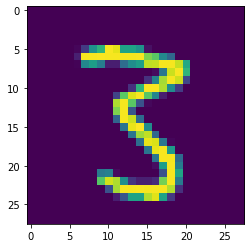

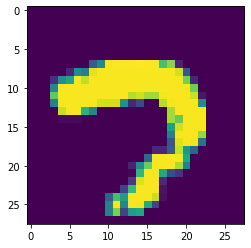

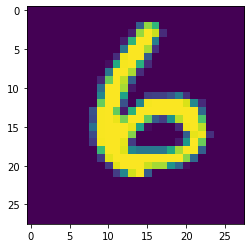

In [19]:
for i in number[4]:
    plt.imshow(images[i].reshape(28, 28))
    plt.show()